**Name:** Eric Myles Panganiban<br>
**ID:** 21103306

# <font color=red>Assignment</font>

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

# Introduction

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death. Predicting dengue cases or outbreaks would not only help people who are most vulnerable, but it would also help everyone when it comes to reducing the the impact of these epidemics.

    city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0     sj  2008          18      2008-04-29 -0.018900 -0.018900  0.102729   
1     sj  2008          19      2008-05-06 -0.018000 -0.012400  0.082043   
2     sj  2008          20      2008-05-13 -0.001500       NaN  0.151083   
3     sj  2008          21      2008-05-20       NaN -0.019867  0.124329   
4     sj  2008          22      2008-05-27  0.056800  0.039833  0.062267   
..   ...   ...         ...             ...       ...       ...       ...   
411   iq  2013          22      2013-05-28  0.301471  0.380029  0.280629   
412   iq  2013          23      2013-06-04  0.247600  0.296343  0.285371   
413   iq  2013          24      2013-06-11  0.238729  0.251029  0.252586   
414   iq  2013          25      2013-06-18  0.310429  0.302700  0.406614   
415   iq  2013          26      2013-06-25  0.339467  0.240071  0.356943   

      ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0    0.091200       

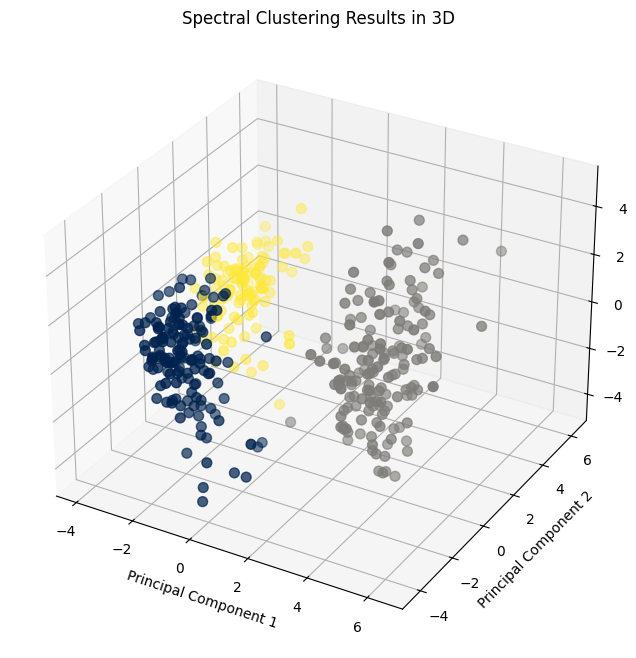

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

# Loads the dataset
data = pd.read_csv('dengue_features_test.csv')

# Select the relevant columns for clustering
selected_columns = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
                     'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
                     'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
                     'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c',
                     'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']
numeric_data = data[selected_columns]

# Drop non-numeric columns
numeric_data = numeric_data.select_dtypes(include=[np.number])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Standardize the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=min(3, numeric_data_scaled.shape[1]))  # Use 3 components for 3D
numeric_data_pca = pca.fit_transform(numeric_data_scaled)

# Perform spectral clustering
n_clusters = 3  # Set the number of clusters to 3 for 3D visualization
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(numeric_data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = labels
print(data[['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
           'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
           'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
           'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
           'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c',
           'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']])

# Visualize the clustering results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(numeric_data_pca[:, 0], numeric_data_pca[:, 1], numeric_data_pca[:, 2], c=labels, s=50, cmap='cividis')

ax.set_title('Spectral Clustering Results in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


# Conclusion

From my observation with the use of spectral clustering and with the use of PCA. The data set used to show a three-dimensional graphs tells us that there may be a set of connections or patterns when it comes to the rise of dengue cases based on either the certain time or season of the year. Additionally, the three clusters have some sort of similiarities in shape which could signify that both regions either have the same predicted outcome due to them having the same amount of weather patterns, or similar amount of dengue outbreaks. However, visiual similarity does not always tell the full story. It's suggested to do more analysis and gather more data in order to provide a clearer picture or idea of the entire situation.

# <font color=red>Eigenvector Centrality Assignment 1</font>

Given the following graph below, find it eigenvector centrality:

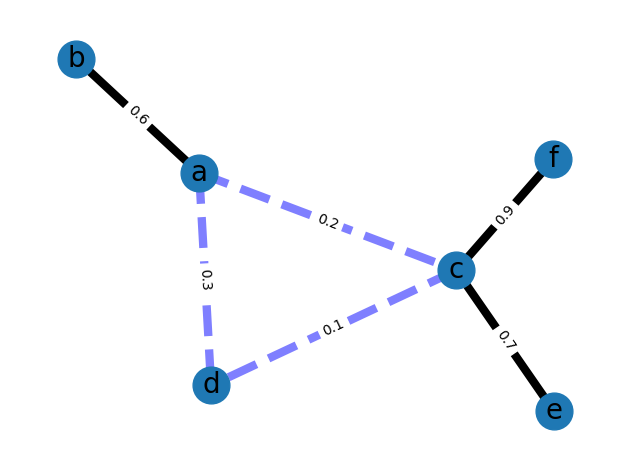

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

<font color=green>**Solution:**</font>

In [4]:
nx.eigenvector_centrality(G)

{'a': 0.51807347662071,
 'b': 0.21182192277183212,
 'c': 0.5986761070959697,
 'd': 0.4566010978754134,
 'e': 0.24477918831750853,
 'f': 0.24477918831750853}

# <font color=red>Assignment 2</font>

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

Name of Chosen Data: Russian and Ukrainian Equipment Losses Data

Scope of Collected Data:

Subreddit: AskReddit
Title: Ask Reddit...
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='ShoddySubstance'), Redditor(name='NaziGazpacho'), Redditor(name='Quinthyll'), Redditor(name='HillarysDoubleChin'), Redditor(name='Fushigibama')]


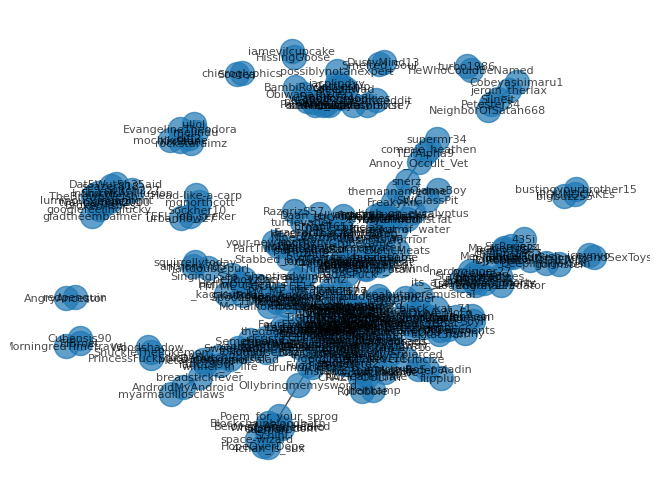

In [21]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(client_id='s_2K_r9RHwzqSRXp-RS3dg',
                        client_secret='hUn5ZH6ddg3n6A4EK2Ie1QKeEIlFDw',
                        user_agent='Zenolitee')

def print_subreddit_info(subreddit):
    print(f"Subreddit: {subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Skip MoreComments objects
        if isinstance(comment, praw.models.MoreComments):
            continue

        # Check if the comment and parent comment have valid authors
        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)  # Set layout algorithm
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

# Choose a subreddit
subreddit_name = "AskReddit"
subreddit = reddit.subreddit(subreddit_name)

# Print subreddit information
print_subreddit_info(subreddit)

# Get the top post from the subreddit
post_id = get_top_post_id(subreddit)

# Create social network graph from comments
social_network = create_social_network(post_id)

# Perform social network analysis
perform_social_network_analysis(social_network)

# Visualize the network
visualize_network(social_network)